# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('zillow_data copy.csv')
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,329121.0,334059.0,338019.0,346657.0,354457.0,361917.0,369769.0,376112.0,381673.0,386586.0,394154.0,402687.0,412006.0,420541.0,429242.0,436291.0,442139.0,447655.0,452725.0,457455.0,461020.0,465658.0,469811.0,475268.0,478912.0,482464.0,484481.0,488259.0,493127.0,499165.0,503717.0,507932.0,511068.0,514280.0,518252.0,522487.0,527352.0,531284.0,535317.0,539349.0,549450.0,567133.0,588505.0,605851.0,613242.0,617110.0,619549.0,625388.0,631255.0,636089.0,639742.0,643306.0,647193.0,652314.0,659961.0,669842.0,683972.0,696806.0,708743.0,716797.0,728843.0,739511.0,759399.0,771571.0,785979.0,795559.0,805064.0,814587.0,817033.0,832764.0,850933.0,876511.0,901911.0,921178.0,927869.0,922251.0,924475.0,931610.0,934145.0,909286.0,874103.0,840213.0,841253.0,864029.0,878088.0,880955.0,875206.0,881249.0,884836.0,877242.0,872894.0,865069.0,888219.0,909058.0,932691.0,932638.0,933780.0,929386.0,935242.0,949011.0,950769.0,940471.0,901618.0,887671.0,894583.0,898397.0,891086.0,854973.0,823871.0,7

# Step 2: Data Preprocessing

In [4]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[9:], format='%Y-%m')

In [5]:
df.columns = list(df.columns[:9]) + list(get_datetimes(df))

In [15]:
# df =get_datetimes(df)

In [5]:
# df_new= get_datetimes(df)

In [21]:
# df_new

In [22]:
# df_new.isnull().sum()

In [6]:
df.iloc[:,0:9].isnull().sum()

RegionID         0
SizeRank         0
RegionName       0
RegionType       0
StateName        0
State            0
City             0
Metro         7115
CountyName       0
dtype: int64

In [7]:
df.drop('Metro', inplace =True, axis =1)

In [8]:
df.iloc[:,:8].isnull().sum()


RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     0
State         0
City          0
CountyName    0
dtype: int64

In [9]:
# df_state.iloc[3].max()

In [10]:
df_state=df.groupby(df['State']).mean()
df_state

,RegionID,SizeRank,RegionName,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-30 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,2000-08-31 00:00:00,2000-09-30 00:00:00,2000-10-31 00:00:00,2000-11-30 00:00:00,2000-12-31 00:00:00,2001-01-31 00:00:00,2001-02-28 00:00:00,2001-03-31 00:00:00,2001-04-30 00:00:00,2001-05-31 00:00:00,2001-06-30 00:00:00,2001-07-31 00:00:00,2001-08-31 00:00:00,2001-09-30 00:00:00,2001-10-31 00:00:00,2001-11-30 00:00:00,2001-12-31 00:00:00,2002-01-31 00:00:00,2002-02-28 00:00:00,2002-03-31 00:00:00,2002-04-30 00:00:00,2002-05-31 00:00:00,2002-06-30 00:00:00,2002-07-31 00:00:00,2002-08-31 00:00:00,2002-09-30 00:00:00,2002-10-31 00:00:00,2002-11-30 00:00:00,2002-12-31 00:00:00,2003-01-31 00:00:00,2003-02-28 00:00:00,2003-03-31 00:00:00,2003-04-30 00:00:00,2003-05-31 00:00:00,2003-06-30 00:00:00,2003-07-31 00:00:00,2003-08-31 00:00:00,2003-09-30 00:00:00,2003-10-31 00:00:00,2003-11-30 00:00:00,2003-12-31 00:00:00,2004-01-31 00:00:00,2004-02-29 00:00:00,2004-03-31 00:00:00,2004-04-30 00:00:00,2004-05-31 00:00:00,2004-06-30 00:00:00,2004-07-31 00:00:00,2004-08-31 00:00:00,2004-09-30 00:00:00,2004-10-31 00:00:00,2004-11-30 00:00:00,2004-12-31 00:00:00,2005-01-31 00:00:00,2005-02-28 00:00:00,2005-03-31 00:00:00,2005-04-30 00:00:00,2005-05-31 00:00:00,2005-06-30 00:00:00,2005-07-31 00:00:00,2005-08-31 00:00:00,2005-09-30 00:00:00,2005-10-31 00:00:00,2005-11-30 00:00:00,2005-12-31 00:00:00,2006-01-31 00:00:00,2006-02-28 00:00:00,2006-03-31 00:00:00,2006-04-30 00:00:00,2006-05-31 00:00:00,2006-06-30 00:00:00,2006-07-31 00:00:00,2006-08-31 00:00:00,2006-09-30 00:00:00,2006-10-31 00:00:00,2006-11-30 00:00:00,2006-12-31 00:00:00,2007-01-31 00:00:00,2007-02-28 00:00:00,2007-03-31 00:00:00,2007-04-30 00:00:00,2007-05-31 00:00:00,2007-06-30 00:00:00,2007-07-31 00:00:00,2007-08-31 00:00:00,2007-09-30 00:00:00,2007-10-31 00:00:00,2007-11-30 00:00:00,2007-12-31 00:00:00,2008-01-31 00:00:00,2008-02-29 00:00:00,2008-03-31 00:00:00,2008-04-30 00:00:00,2008-05-31 00:00:00,2008-06-30 00:00:00,2008-07-31 00:00:00,2008-08-31 00:00:00,2008-09-30 00:00:00,2008-10-31 00:00:00,2008-11-30 00:00:00,2008-12-31 00:00:00,2009-01-31 00:00:00,2009-02-28 00:00:00,2009-03-31 00:00:00,2009-04-30 00:00:00,2009-05-31 00:00:00,2009-06-30 00:00:00,2009-07-31 00:00:00,2009-08-31 00:00:00,2009-09-30 00:00:00,2009-10-31 00:00:00,2009-11-30 00:00:00,2009-12-31 00:00:00,2010-01-31 00:00:00,2010-02-28 00:00:00,2010-03-31 00:00:00,2010-04-30 00:00:00,2010-05-31 00:00:00,2010-06-30 00:00:00,2010-07-31 00:00:00,2010-08-31 00:00:00,2010-09-30 00:00:00,2010-10-31 00:00:00,2010-11-30 00:00:00,2010-12-31 00:00:00,2011-01-31 00:00:00,2011-02-28 00:00:00,2011-03-31 00:00:00,2011-04-30 00:00:00,2011-05-31 00:00:00,2011-06-30 00:00:00,2011-07-31 00:00:00,2011-08-31 00:00:00,2011-09-30 00:00:00,2011-10-31 00:00:00,2011-11-30 00:00:00,2011-12-31 00:00:00,2012-01-31 00:00:00,2012-02-29 00:00:00,2012-03-31 00:00:00,2012-04-30 00:00:00,2012-05-31 00:00:00,2012-06-30 00:00:00,2012-07-31 00:00:00,2012-08-31 00:00:00,2012-09-30 00:00:00,2012-10-31 00:00:00,2012-11-30 00:00:00,2012-12-31 00:00:00,2013-01-31 00:00:00,2013-02-28 00:00:00,2013-03-31 00:00:00,2013-04-30 00:00:00,2013-05-31 00:00:00,2013-06-30 00:00:00,2013-07-31 00:00:00,2013-08-31 00:00:00,2013-09-30 00:00:00,2013-10-31 00:00:00,2013-11-30 00:00:00,2013-12-31 00:00:00,2014-01-31 00:00:00,2014-02-28 00:00:00,2014-03-31 00:00:00,2014-04-30 00:00:00,2014-05-31 00:00:00,2014-06-30 00:00:00,2014-07-31 00:00:00,2014-08-31 00:00:00,2014-09-30 00:00:00,2014-10-31 00:00:00,2014-11-30 00:00:00,2014-12-31 00:00:00,2015-01-31 00:00:00,2015-02-28 00:00:00,2015-03-31 00:00:00,2015-04-30 00:00:00,2015-05-31 00:00:00,2015-06-30 00:00:00,2015-07-31 00:00:00,2015-08-31 00:00:00,2015-09-30 00:00:00,2015-10-31 00:00:00,2015-11-30 00:00:00,2015-12-31 00:00:00,2016-01-31 00:00:00,2016-02-29 00:00:00,2016-03-31 00:00:00,2016-04-30 00:00:00,2016-05-31 00:00:00,2016-06-30 00:00:00,2016-07-31

In [11]:
pwd

'/Users/avijames/Dropbox/Mac (2)/Documents/Course/project_4/forecasting_real_estate_prices'

In [12]:
c = df.columns.tolist()
cols = c[:9] 
cols.append(c[-1]) 
print (cols)

#set to index all NOT date columns
tdf = df.set_index(df.columns.tolist()[:9])
tdf.columns = pd.to_datetime(tdf.columns).to_period('M')

# find the columns in the period 2000-2021
cols = tdf.columns
sel_cols = cols[(cols > '2000-01') & (cols < '2022')]
print (sel_cols)


#change format columns
a = tdf[sel_cols].rename(columns=lambda x: '{:}'.format(x.year, [1]))
print (a.columns)

#groupby by a with new format
mdf = a.groupby(a.columns, axis=1).mean().reset_index()

['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'CountyName', Timestamp('2000-01-31 00:00:00'), Timestamp('2021-08-31 00:00:00')]
PeriodIndex(['2000-02', '2000-03', '2000-04', '2000-05', '2000-06', '2000-07',
             '2000-08', '2000-09', '2000-10', '2000-11',
             ...
             '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04',
             '2021-05', '2021-06', '2021-07', '2021-08'],
            dtype='period[M]', length=259, freq='M')
Index(['2000', '2000', '2000', '2000', '2000', '2000', '2000', '2000', '2000',
       '2000',
       ...
       '2020', '2020', '2021', '2021', '2021', '2021', '2021', '2021', '2021',
       '2021'],
      dtype='object', length=259)


In [13]:
# pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [14]:
mdf

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,CountyName,2000-01-31 00:00:00,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,61639,0,10025,Zip,NY,NY,New York,New York County,329121.0,367826.363636,447484.250000,500345.333333,576627.500000,665501.666667,7.981462e+05,8.993602e+05,8.898454e+05,9.139156e+05,7.592758e+05,709883.916667,740445.500000,7.531898e+05,8.036307e+05,9.132885e+05,9.817538e+05,1.039384e+06,1.039147e+06,1.057255e+06,1.086893e+06,1.051246e+06,1114518.875
1,84654,1,60657,Zip,IL,IL,Chicago,Cook County,311929.0,331131.818182,371998.333333,401644.666667,421723.583333,439756.000000,4.671713e+05,4.919292e+05,4.913812e+05,4.709787e+05,4.344749e+05,422539.666667,398936.000000,3.846148e+05,4.161048e+05,4.476602e+05,4.568003e+05,4.719039e+05,4.852757e+05,4.922336e+05,4.867452e+05,4.897790e+05,509026.125
2,61637,2,10023,Zip,NY,NY,New York,New York County,500887.0,541272.000000,636834.166667,716431.416667,809314.166667,915925.083333,1.078528e+06,1.206610e+06,1.207426e+06,1.272393e+06,1.021550e+06,938849.000000,997383.166667,1.034857e+06,1.103962e+06,1.243271e+06,1.321928e+06,1.392055e+06,1.422695e+06,1.505360e+06,1.419982e+06,1.471571e+06,1456762.750
3,91982,3,77494,Zip,TX,TX,Katy,Harris County,225325.0,226703.727273,229747.166667,230232.583333,234434.916667,243372.833333,2.500888e+05,2.536468e+05,2.611938e+05,2.646818e+05,2.646564e+05,271164.083333,263868.500000,2.684410e+05,2.869938e+05,3.192941e+05,3.397708e+05,3.375233e+05,3.345385e+05,3.381329e+05,3.393977e+05,3.434595e+05,382106.375
4,84616,4,60614,Zip,IL,IL,Chicago,Cook County,405926.0,427281.000000,476746.583333,510428.833333,535184.333333,555543.833333,5.897735e+05,6.223890e+05,6.255586e+05,5.998671e+05,5.543326e+05,535821.166667,502984.750000,4.886890e+05,5.315863e+05,5.732739e+05,5.939389e+05,6.149928e+05,6.308151e+05,6.382121e+05,6.310842e+05,6.287728e+05,649397.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30518,66169,34430,20052,Zip,DC,DC,Washington,District of Columbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.008782e+06,1.128236e+06,1.173981e+06,1.212649e+06,1.329028e+06,1.280291e+06,1.312291e+06,1.364288e+06,1421879.875
30519,89666,34430,72630,Zip,AR,AR,Diamond City,Boone County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.067427e+05,112764.750
30520,62532,34430,12345,Zip,OR,OR,Central Point,Jackson County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.752542e+04,8.052867e+04,8.587800e+04,9.975333e+04,1.118452e+05,1.188176e+05,1.303943e+05,1.370604e+05,1.371219e+05,159635.000
30521,87060,34430,66045,Zip,KS,KS,Lawrence,Douglas County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.839559e+05,1.873850e+05,1.974940e+05,241802.875


In [15]:
mdf['average_annual_return'] = (((mdf['2021']-mdf['2000'])/mdf['2000'])*100)
mdf['average_annual_return'].max()

891.4023783185839

In [16]:
mdf['average_return'] = ((mdf['2000'] + mdf['2001']+ mdf['2002']+ mdf['2003']+ mdf['2004']+ mdf['2005']+ mdf['2006']+ mdf['2007']+ mdf['2008']+ mdf['2009']+ mdf['2010']+ mdf['2011']+ mdf['2012']+ mdf['2013']+ mdf['2014']+ mdf['2015']+ mdf['2016']+ mdf['2017']+ mdf['2018']+ mdf['2019']+ mdf['2021']+ mdf['2021'])/21)
mdf

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,CountyName,2000-01-31 00:00:00,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,average_annual_return,average_return
0,61639,0,10025,Zip,NY,NY,New York,New York County,329121.0,367826.363636,447484.250000,500345.333333,576627.500000,665501.666667,7.981462e+05,8.993602e+05,8.898454e+05,9.139156e+05,7.592758e+05,709883.916667,740445.500000,7.531898e+05,8.036307e+05,9.132885e+05,9.817538e+05,1.039384e+06,1.039147e+06,1.057255e+06,1.086893e+06,1.051246e+06,1114518.875,203.001357,8.653446e+05
1,84654,1,60657,Zip,IL,IL,Chicago,Cook County,311929.0,331131.818182,371998.333333,401644.666667,421723.583333,439756.000000,4.671713e+05,4.919292e+05,4.913812e+05,4.709787e+05,4.344749e+05,422539.666667,398936.000000,3.846148e+05,4.161048e+05,4.476602e+05,4.568003e+05,4.719039e+05,4.852757e+05,4.922336e+05,4.867452e+05,4.897790e+05,509026.125,53.723109,4.668122e+05
2,61637,2,10023,Zip,NY,NY,New York,New York County,500887.0,541272.000000,636834.166667,716431.416667,809314.166667,915925.083333,1.078528e+06,1.206610e+06,1.207426e+06,1.272393e+06,1.021550e+06,938849.000000,997383.166667,1.034857e+06,1.103962e+06,1.243271e+06,1.321928e+06,1.392055e+06,1.422695e+06,1.505360e+06,1.419982e+06,1.471571e+06,1456762.750,169.136913,1.176198e+06
3,91982,3,77494,Zip,TX,TX,Katy,Harris County,225325.0,226703.727273,229747.166667,230232.583333,234434.916667,243372.833333,2.500888e+05,2.536468e+05,2.611938e+05,2.646818e+05,2.646564e+05,271164.083333,263868.500000,2.684410e+05,2.869938e+05,3.192941e+05,3.397708e+05,3.375233e+05,3.345385e+05,3.381329e+05,3.393977e+05,3.434595e+05,382106.375,68.548784,3.010522e+05
4,84616,4,60614,Zip,IL,IL,Chicago,Cook County,405926.0,427281.000000,476746.583333,510428.833333,535184.333333,555543.833333,5.897735e+05,6.223890e+05,6.255586e+05,5.998671e+05,5.543326e+05,535821.166667,502984.750000,4.886890e+05,5.315863e+05,5.732739e+05,5.939389e+05,6.149928e+05,6.308151e+05,6.382121e+05,6.310842e+05,6.287728e+05,649397.375,51.983677,5.970142e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30518,66169,34430,20052,Zip,DC,DC,Washington,District of Columbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.008782e+06,1.128236e+06,1.173981e+06,1.212649e+06,1.329028e+06,1.280291e+06,1.312291e+06,1.364288e+06,1421879.875,NaN,NaN
30519,89666,34430,72630,Zip,AR,AR,Diamond City,Boone County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.067427e+05,112764.750,NaN,NaN
30520,62532,34430,12345,Zip,OR,OR,Central Point,Jackson County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.752542e+04,8.052867e+04,8.587800e+04,9.975333e+04,1.118452e+05,1.188176e+05,1.303943e+05,1.370604e+05,1.371219e+05,159635.000,NaN,NaN
30521,87060,34430,66045,Zip,KS,KS,Lawrence,Douglas County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.839559e+05,1.873850e+05,1.974940e+05,241802.875,NaN,NaN


In [17]:
mdf['rate_year']=mdf['average_annual_return']/21
mdf

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,CountyName,2000-01-31 00:00:00,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,average_annual_return,average_return,rate_year
0,61639,0,10025,Zip,NY,NY,New York,New York County,329121.0,367826.363636,447484.250000,500345.333333,576627.500000,665501.666667,7.981462e+05,8.993602e+05,8.898454e+05,9.139156e+05,7.592758e+05,709883.916667,740445.500000,7.531898e+05,8.036307e+05,9.132885e+05,9.817538e+05,1.039384e+06,1.039147e+06,1.057255e+06,1.086893e+06,1.051246e+06,1114518.875,203.001357,8.653446e+05,9.666731
1,84654,1,60657,Zip,IL,IL,Chicago,Cook County,311929.0,331131.818182,371998.333333,401644.666667,421723.583333,439756.000000,4.671713e+05,4.919292e+05,4.913812e+05,4.709787e+05,4.344749e+05,422539.666667,398936.000000,3.846148e+05,4.161048e+05,4.476602e+05,4.568003e+05,4.719039e+05,4.852757e+05,4.922336e+05,4.867452e+05,4.897790e+05,509026.125,53.723109,4.668122e+05,2.558243
2,61637,2,10023,Zip,NY,NY,New York,New York County,500887.0,541272.000000,636834.166667,716431.416667,809314.166667,915925.083333,1.078528e+06,1.206610e+06,1.207426e+06,1.272393e+06,1.021550e+06,938849.000000,997383.166667,1.034857e+06,1.103962e+06,1.243271e+06,1.321928e+06,1.392055e+06,1.422695e+06,1.505360e+06,1.419982e+06,1.471571e+06,1456762.750,169.136913,1.176198e+06,8.054139
3,91982,3,77494,Zip,TX,TX,Katy,Harris County,225325.0,226703.727273,229747.166667,230232.583333,234434.916667,243372.833333,2.500888e+05,2.536468e+05,2.611938e+05,2.646818e+05,2.646564e+05,271164.083333,263868.500000,2.684410e+05,2.869938e+05,3.192941e+05,3.397708e+05,3.375233e+05,3.345385e+05,3.381329e+05,3.393977e+05,3.434595e+05,382106.375,68.548784,3.010522e+05,3.264228
4,84616,4,60614,Zip,IL,IL,Chicago,Cook County,405926.0,427281.000000,476746.583333,510428.833333,535184.333333,555543.833333,5.897735e+05,6.223890e+05,6.255586e+05,5.998671e+05,5.543326e+05,535821.166667,502984.750000,4.886890e+05,5.315863e+05,5.732739e+05,5.939389e+05,6.149928e+05,6.308151e+05,6.382121e+05,6.310842e+05,6.287728e+05,649397.375,51.983677,5.970142e+05,2.475413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30518,66169,34430,20052,Zip,DC,DC,Washington,District of Columbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.008782e+06,1.128236e+06,1.173981e+06,1.212649e+06,1.329028e+06,1.280291e+06,1.312291e+06,1.364288e+06,1421879.875,NaN,NaN,NaN
30519,89666,34430,72630,Zip,AR,AR,Diamond City,Boone County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.067427e+05,112764.750,NaN,NaN,NaN
30520,62532,34430,12345,Zip,OR,OR,Central Point,Jackson County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.752542e+04,8.052867e+04,8.587800e+04,9.975333e+04,1.118452e+05,1.188176e+05,1.303943e+05,1.370604e+05,1.371219e+05,159635.000,NaN,NaN,NaN
30521,87060,34430,66045,Zip,KS,KS,Lawrence,Douglas County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.839559e+05,1.873850e+05,1.974940e+05,241802.875,NaN,NaN,NaN


In [23]:
mdf[mdf['RegionName']== 11216]

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,CountyName,2000-01-31 00:00:00,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,average_annual_return,average_return,rate_year
513,62027,516,11216,Zip,NY,NY,New York,Kings County,146780.0,159543.0,186038.166667,220661.5,268010.916667,313416.416667,377583.333333,460031.75,522687.083333,541119.583333,471203.166667,456315.666667,465404.083333,507982.166667,613773.833333,814626.583333,969616.833333,1.058784e+06,1.076584e+06,1.145235e+06,1.144215e+06,1.145505e+06,1152785.125,622.554499,670400.087302,29.645452


In [24]:
mdf.drop('rate/year',inplace=True, axis =1)
mdf

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,CountyName,2000-01-31 00:00:00,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,average_return,average_annual_return,rate_year
0,61639,0,10025,Zip,NY,NY,New York,New York County,329121.0,367826.363636,447484.250000,500345.333333,576627.500000,665501.666667,7.981462e+05,8.993602e+05,8.898454e+05,9.139156e+05,7.592758e+05,709883.916667,740445.500000,7.531898e+05,8.036307e+05,9.132885e+05,9.817538e+05,1.039384e+06,1.039147e+06,1.057255e+06,1.086893e+06,1.051246e+06,1114518.875,8.653446e+05,203.001357,9.666731
1,84654,1,60657,Zip,IL,IL,Chicago,Cook County,311929.0,331131.818182,371998.333333,401644.666667,421723.583333,439756.000000,4.671713e+05,4.919292e+05,4.913812e+05,4.709787e+05,4.344749e+05,422539.666667,398936.000000,3.846148e+05,4.161048e+05,4.476602e+05,4.568003e+05,4.719039e+05,4.852757e+05,4.922336e+05,4.867452e+05,4.897790e+05,509026.125,4.668122e+05,53.723109,2.558243
2,61637,2,10023,Zip,NY,NY,New York,New York County,500887.0,541272.000000,636834.166667,716431.416667,809314.166667,915925.083333,1.078528e+06,1.206610e+06,1.207426e+06,1.272393e+06,1.021550e+06,938849.000000,997383.166667,1.034857e+06,1.103962e+06,1.243271e+06,1.321928e+06,1.392055e+06,1.422695e+06,1.505360e+06,1.419982e+06,1.471571e+06,1456762.750,1.176198e+06,169.136913,8.054139
3,91982,3,77494,Zip,TX,TX,Katy,Harris County,225325.0,226703.727273,229747.166667,230232.583333,234434.916667,243372.833333,2.500888e+05,2.536468e+05,2.611938e+05,2.646818e+05,2.646564e+05,271164.083333,263868.500000,2.684410e+05,2.869938e+05,3.192941e+05,3.397708e+05,3.375233e+05,3.345385e+05,3.381329e+05,3.393977e+05,3.434595e+05,382106.375,3.010522e+05,68.548784,3.264228
4,84616,4,60614,Zip,IL,IL,Chicago,Cook County,405926.0,427281.000000,476746.583333,510428.833333,535184.333333,555543.833333,5.897735e+05,6.223890e+05,6.255586e+05,5.998671e+05,5.543326e+05,535821.166667,502984.750000,4.886890e+05,5.315863e+05,5.732739e+05,5.939389e+05,6.149928e+05,6.308151e+05,6.382121e+05,6.310842e+05,6.287728e+05,649397.375,5.970142e+05,51.983677,2.475413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30518,66169,34430,20052,Zip,DC,DC,Washington,District of Columbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.008782e+06,1.128236e+06,1.173981e+06,1.212649e+06,1.329028e+06,1.280291e+06,1.312291e+06,1.364288e+06,1421879.875,NaN,NaN,NaN
30519,89666,34430,72630,Zip,AR,AR,Diamond City,Boone County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.067427e+05,112764.750,NaN,NaN,NaN
30520,62532,34430,12345,Zip,OR,OR,Central Point,Jackson County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.752542e+04,8.052867e+04,8.587800e+04,9.975333e+04,1.118452e+05,1.188176e+05,1.303943e+05,1.370604e+05,1.371219e+05,159635.000,NaN,NaN,NaN
30521,87060,34430,66045,Zip,KS,KS,Lawrence,Douglas County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.839559e+05,1.873850e+05,1.974940e+05,241802.875,NaN,NaN,NaN


In [23]:
mdf['rate_year'].max()

42.44773230088495

In [74]:
df = pd.melt(df, id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName'], var_name='time')
df['time'] = pd.to_datetime(df['time'], infer_datetime_format=True)
df.set_index(df['time'], inplace=True)
df.drop('time', axis=1, inplace=True)

In [47]:
df.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName', 'CountyName' ], inplace= True, axis =1)


In [75]:
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,value
time,,,,,,,,,,
2000-01-31,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,329121.0
2000-01-31,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,311929.0
2000-01-31,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,500887.0
2000-01-31,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,225325.0
2000-01-31,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,405926.0
...,...,...,...,...,...,...,...,...,...,...
2021-08-31,66169,34430,20052,Zip,DC,DC,Washington,Washington-Arlington-Alexandria,District of Columbia,1443140.0
2021-08-31,89666,34430,72630,Zip,AR,AR,Diamond City,Harrison,Boone County,118818.0
2021-08-31,62532,34430,12345,Zip,OR,OR,Central Point,Medford,Jackson County,169411.0


In [50]:
df['ZipCode']=df['RegionName']
df.drop('RegionName', inplace=True, axis =1)
df

,State,City,Metro,value,ZipCode
time,,,,,
2000-01-31,NY,New York,New York-Newark-Jersey City,329121.0,10025
2000-01-31,IL,Chicago,Chicago-Naperville-Elgin,311929.0,60657
2000-01-31,NY,New York,New York-Newark-Jersey City,500887.0,10023
2000-01-31,TX,Katy,Houston-The Woodlands-Sugar Land,225325.0,77494
2000-01-31,IL,Chicago,Chicago-Naperville-Elgin,405926.0,60614
...,...,...,...,...,...
2021-08-31,DC,Washington,Washington-Arlington-Alexandria,1443140.0,20052
2021-08-31,AR,Diamond City,Harrison,118818.0,72630
2021-08-31,OR,Central Point,Medford,169411.0,12345


In [57]:
df.groupby(df['ZipCode']).mean()

,value
ZipCode,
501,91352.681034
602,105140.275862
693,81876.050000
705,111372.396552
734,274782.706897
...,...
99714,151976.984925
99801,348817.616162
99824,259471.656566


# Step 3: EDA and Visualization

In [44]:
import matplotlib.pyplot as plt
import matplotlib


In [45]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Step 4: Reshape from Wide to Long Format

In [46]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})




In [47]:
df =melt_data(df)

In [48]:
df

,value
time,
2000-01-31,147279.169095
2000-02-29,147524.928720
2000-03-31,147960.250126
2000-04-30,149019.600932
2000-05-31,150032.865932
...,...
2021-04-30,255439.475900
2021-05-31,258968.927729
2021-06-30,263308.612333


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


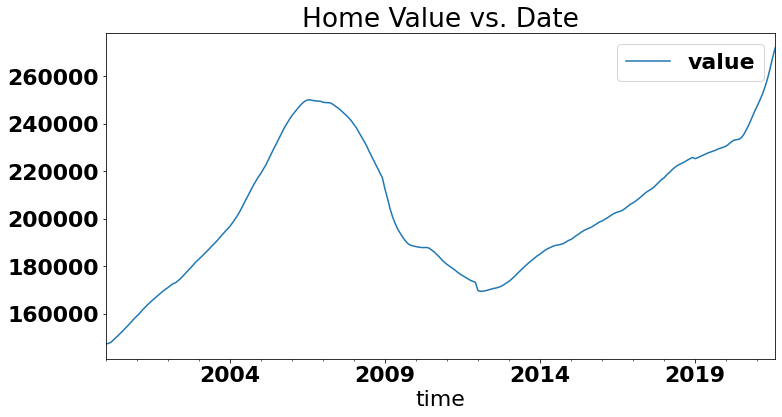

In [49]:
df.plot(figsize=(12,6))
plt.title('Home Value vs. Date');

Clean the data

Dickey Fuller test

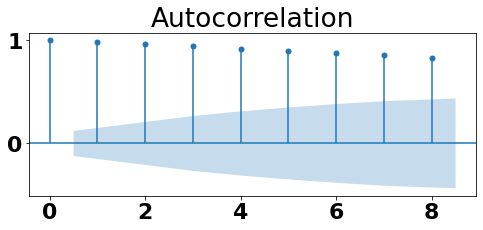

In [51]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(8,3))
plot_acf(df,ax=ax, lags=8);


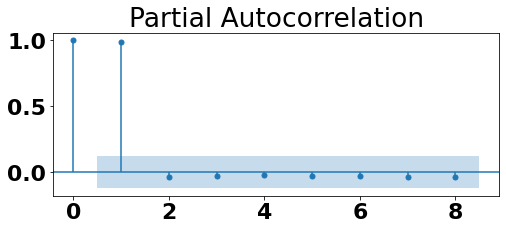

In [53]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(8,3))
plot_pacf(df,ax=ax, lags=8);

In [54]:
# Import ARMA
from statsmodels.tsa.arima_model import ARMA

# Fit an ARMA(1,0) model
mod_arma = ARMA(df, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                  260
Model:                     ARMA(1, 0)   Log Likelihood               -2253.651
Method:                       css-mle   S.D. of innovations           1386.288
Date:                Sun, 03 Oct 2021   AIC                           4513.301
Time:                        17:38:46   BIC                           4523.983
Sample:                    01-31-2000   HQIC                          4517.596
                         - 08-31-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.034e+05   6.08e+04      3.347      0.001    8.43e+04    3.22e+05
ar.L1.value     0.9997      0.000   2736.325      0.000       0.999       1.000
                                    Roots       

/Users/avijames/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/avijames/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency i

In [55]:
# Fit an ARMA(2,1) model
mod_arma = ARMA(df, order=(2,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

/Users/avijames/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/avijames/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency i

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                  260
Model:                     ARMA(2, 1)   Log Likelihood               -1927.617
Method:                       css-mle   S.D. of innovations            390.390
Date:                Sun, 03 Oct 2021   AIC                           3865.235
Time:                        17:46:11   BIC                           3883.038
Sample:                    01-31-2000   HQIC                          3872.392
                         - 08-31-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.034e+05   2.52e+04      8.067      0.000    1.54e+05    2.53e+05
ar.L1.value     1.9910      0.007    277.406      0.000       1.977       2.005
ar.L2.value    -0.9919      0.007   -136.260    

/Users/avijames/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [56]:
# Fit an ARMA(2,2) model
mod_arma = ARMA(df, order=(2,2))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                  260
Model:                     ARMA(2, 2)   Log Likelihood               -1927.147
Method:                       css-mle   S.D. of innovations            389.992
Date:                Sun, 03 Oct 2021   AIC                           3866.295
Time:                        17:46:48   BIC                           3887.659
Sample:                    01-31-2000   HQIC                          3874.884
                         - 08-31-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.034e+05   2.65e+04      7.679      0.000    1.51e+05    2.55e+05
ar.L1.value     1.9878      0.010    208.695      0.000       1.969       2.007
ar.L2.value    -0.9887      0.010   -102.258    

/Users/avijames/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/avijames/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency i

In [58]:
roll_mean = df.rolling(window=12, center=False).mean()
roll_std = df.rolling(window=12, center=False).std()

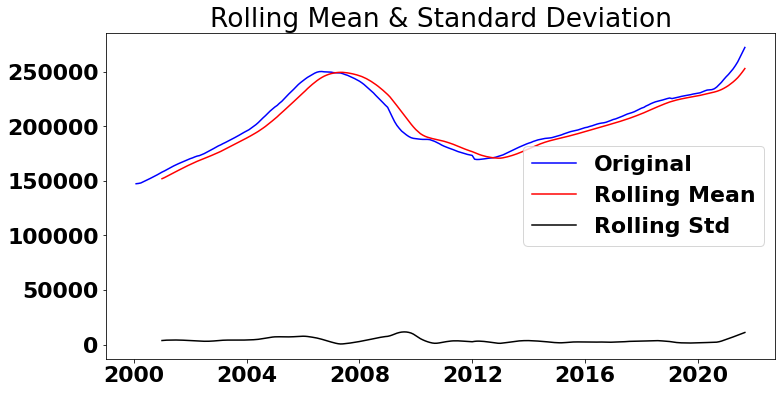

In [60]:
# Plot rolling statistics
fig = plt.figure(figsize=(12,6))
plt.plot(df, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [62]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test: \n')
dftest = adfuller(df['value'])

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test: 

Test Statistic                  -1.147138
p-value                          0.695913
#Lags Used                       2.000000
Number of Observations Used    257.000000
Critical Value (1%)             -3.456054
Critical Value (5%)             -2.872853
Critical Value (10%)            -2.572799
dtype: float64


# Step 5: ARIMA Modeling

# Step 6: Interpreting Results